In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [3]:
data, labels, parameters = C.Figure12.generate_datapoint()
print 'Data', data
print 'Labels', labels
print 'Parameters', parameters

Data [20, 25, 54, 60, 17, 58]
Labels [54, 58]
Parameters 57600


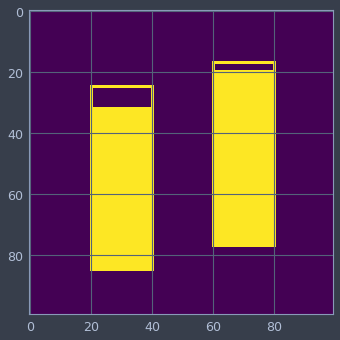

In [4]:
imshow(C.Figure12.data_to_image(data))

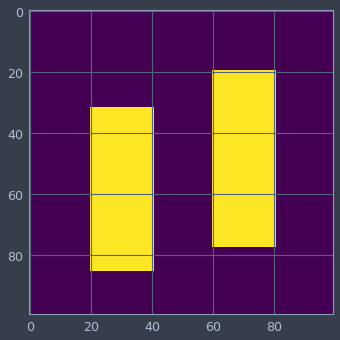

In [5]:
imshow(C.Figure12.data_to_image(data, framed=False))

In [6]:
#
# create many
#

DATATYPE = eval('C.Figure12.data_to_framed_rectangles')
NOISE = True

train_counter = 0
val_counter = 0
test_counter = 0
train_target = 60000
val_target = 20000
test_target = 20000

train_labels = []
val_labels = []
test_labels = []


X_train = np.zeros((train_target, 100, 100), dtype=np.float32)
y_train = np.zeros((train_target, 2), dtype=np.float32)

X_val = np.zeros((val_target, 100, 100), dtype=np.float32)
y_val = np.zeros((val_target, 2), dtype=np.float32)

X_test = np.zeros((test_target, 100, 100), dtype=np.float32)
y_test = np.zeros((test_target, 2), dtype=np.float32)

t0 = time.time()

all_counter = 0
while train_counter < train_target or val_counter < val_target or test_counter < test_target:
  
  all_counter += 1
  
  data, label, parameters = C.Figure12.generate_datapoint()
  
  pot = np.random.choice(3)
  
  # sometimes we know which pot is right
  if label in train_labels:
    pot = 0
  if label in val_labels:
    pot = 1
  if label in test_labels:
    pot = 2
  
  if pot == 0 and train_counter < train_target:

    if label not in train_labels:
      train_labels.append(label)
    
    #
    image = DATATYPE(data)
    image = image.astype(np.float32)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_train[train_counter] = image
    y_train[train_counter] = label
    train_counter += 1
    
  elif pot == 1 and val_counter < val_target:

    if label not in val_labels:
      val_labels.append(label)
      
    image = DATATYPE(data)
    image = image.astype(np.float32)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_val[val_counter] = image
    y_val[val_counter] = label
    val_counter += 1
    
  elif pot == 2 and test_counter < test_target:

    if label not in test_labels:
      test_labels.append(label)
      
    image = DATATYPE(data)
    image = image.astype(np.float32)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_test[test_counter] = image
    y_test[test_counter] = label
    test_counter += 1
    
print 'Done', time.time()-t0


Done 20.1137759686


38564 [ 50.  57.]


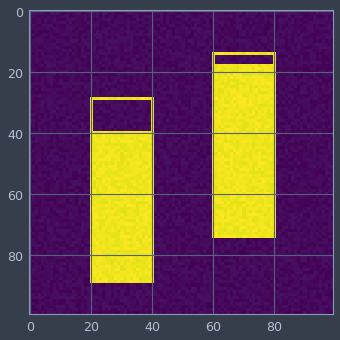

In [7]:
which = np.random.randint(len(X_train))
imshow(X_train[which])
print which, y_train[which]

8456 [ 52.  53.]


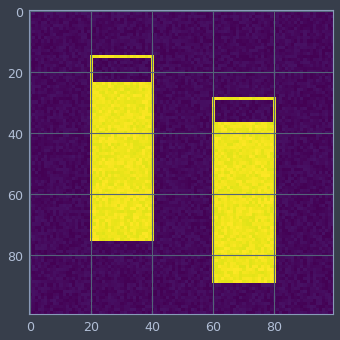

In [8]:
which = np.random.randint(len(X_val))
imshow(X_val[which])
print which, y_val[which]

In [9]:
y_train.min(), y_train.max()

(49.0, 60.0)

In [10]:
50/51.

0.9803921568627451

In [11]:
len(range(y_train.min(),int(y_train.max()+1)))

12

In [12]:
parameters

57600